In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast


In [3]:

# Load your data
data1 = pd.read_csv("../data/processed/sentiment_summary_reviews_BOA.csv")
data2 = pd.read_csv("../data/processed/theme_summary_reviews_BOA.csv")
analyzed_data = pd.read_csv("../data/processed/analyzed_BOA.csv")


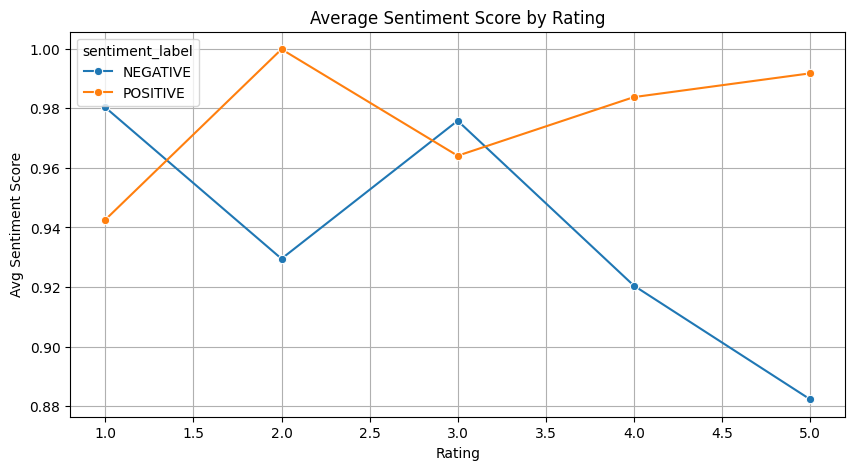

In [4]:

# 1. Sentiment Trends by Rating
plt.figure(figsize=(10, 5))
sns.lineplot(data=data1, x='rating', y='avg_sentiment_score', hue='sentiment_label', marker='o')
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Avg Sentiment Score')
plt.grid(True)
plt.show()

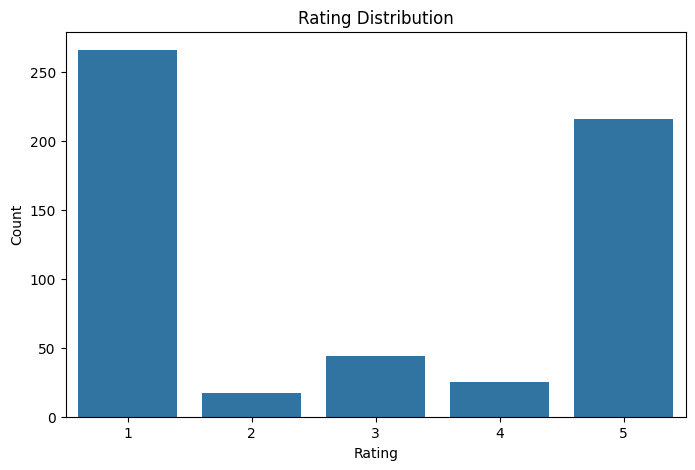

In [5]:

# 2. Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=analyzed_data, x='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


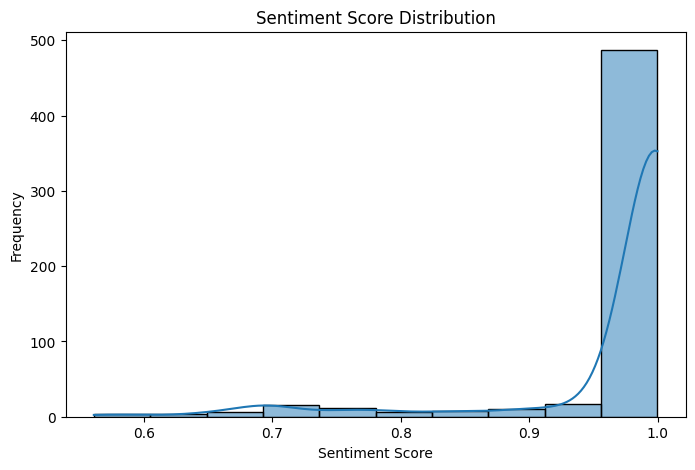

In [6]:

# 3. Sentiment Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(analyzed_data['sentiment_score'], kde=True, bins=10)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10700\416111414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, y='theme', x='count', palette='viridis')


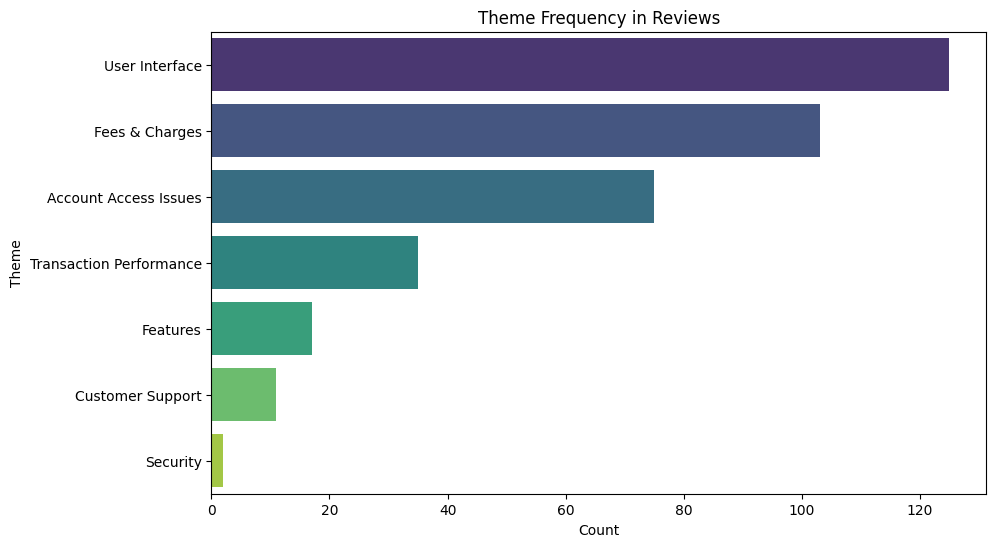

In [7]:

# 4. Theme Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=data2, y='theme', x='count', palette='viridis')
plt.title('Theme Frequency in Reviews')
plt.xlabel('Count')
plt.ylabel('Theme')
plt.show()


In [9]:

# 5. Keyword Word Cloud
keywords = []
for kw_list in analyzed_data['keywords'].dropna():
    try:
        keywords.extend(ast.literal_eval(kw_list))
    except:
        continue

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
).generate(' '.join(keywords))


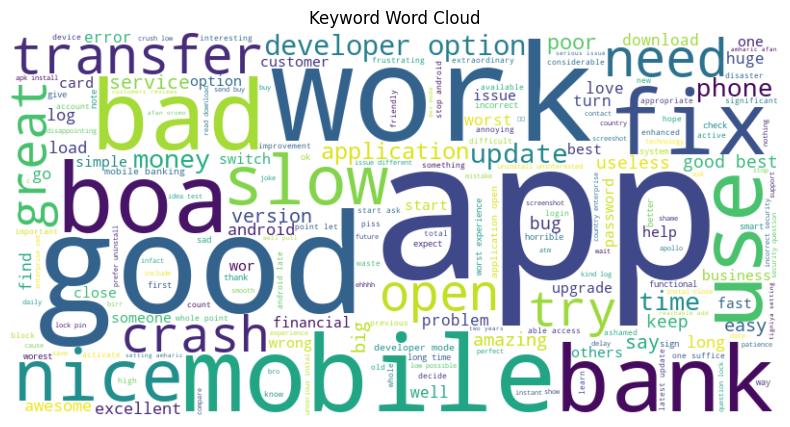

In [10]:

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()